In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from env import host, username, password
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import get_connection

import wrangle

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train

,bedrooms,bathrooms,square_footage,tax_value,year_built,tax_amount,fips
553191,4.0,2.0,1556,373090,1923,4579.25,6037
1209132,3.0,2.0,1513,74070,1937,986.55,6037
174634,4.0,2.0,2040,138000,1954,2553.05,6037
170584,3.0,2.0,1834,263870,1959,3139.76,6059
2001226,2.0,2.0,1225,335603,1975,3461.38,6059
...,...,...,...,...,...,...,...
562147,3.0,2.0,1161,65135,1956,1648.42,6037
1530656,3.0,2.0,2042,130866,1950,1531.56,6037
745152,4.0,2.0,1280,92456,1957,1904.80,6037
249374,2.0,1.0,748,226667,1920,3223.60,6037


# Exercises

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
mm_scaler = MinMaxScaler()

In [6]:
X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value


Text(0.5, 1.0, 'Scaled')

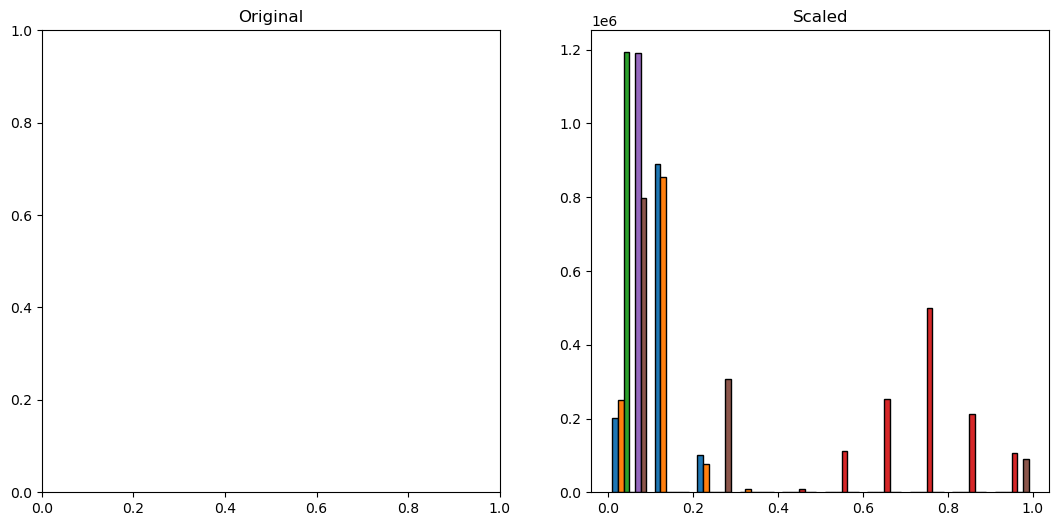

In [7]:
mm_scaler.fit(X_train)

X_train_scaled = mm_scaler.transform(X_train)
X_validate_scaled = mm_scaler.transform(X_validate)
X_test_scaled = mm_scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.hist(X_train, ec='black')
plt.subplot(121)
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')


Text(0.5, 1.0, 'Scaled')

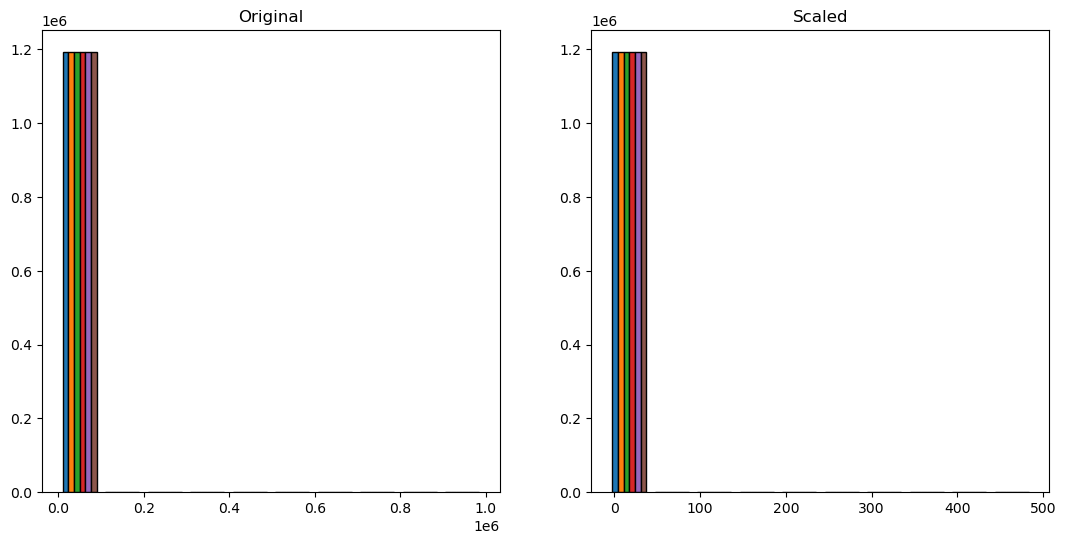

In [8]:
from sklearn.preprocessing import StandardScaler

ss_scaler = StandardScaler()

ss_scaler.fit(X_train)

X_train_scaled = ss_scaler.transform(X_train)
X_validate_scaled = ss_scaler.transform(X_validate)
X_test_scaled = ss_scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')


Text(0.5, 1.0, 'Scaled')

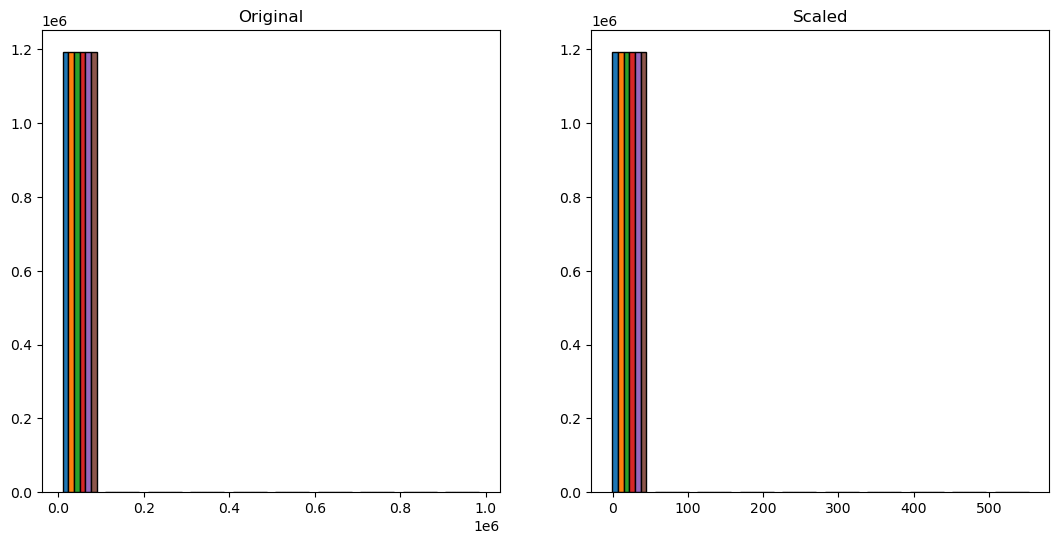

In [9]:
from sklearn.preprocessing import RobustScaler

rs_scaler = RobustScaler()

rs_scaler.fit(X_train)

X_train_scaled = rs_scaler.transform(X_train)
X_validate_scaled = rs_scaler.transform(X_validate)
X_test_scaled = rs_scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Text(0.5, 1.0, 'Scaled')

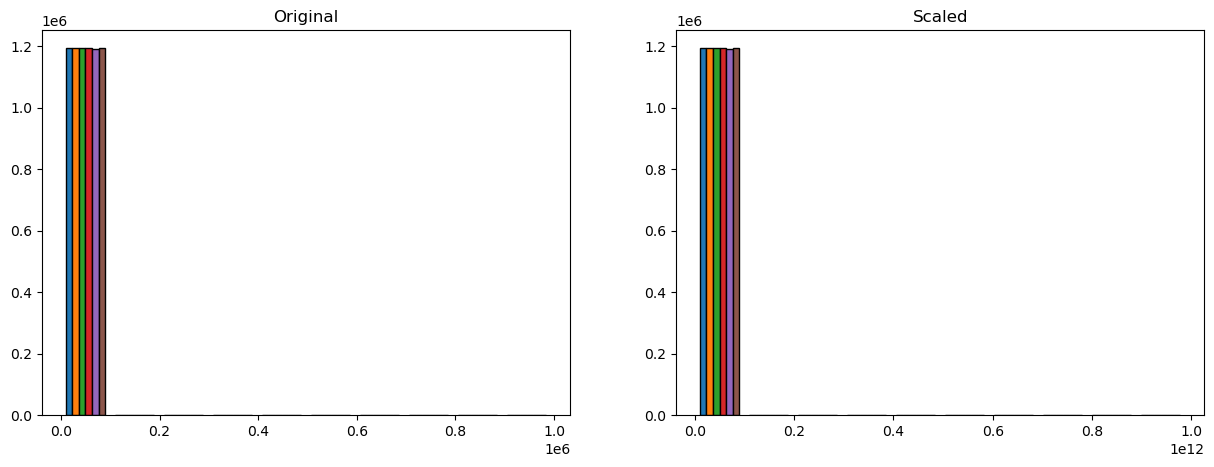

In [10]:
mm_scaler.fit(X_train)

X_train_scaled = mm_scaler.inverse_transform(X_train)
X_validate_scaled = mm_scaler.inverse_transform(X_validate)
X_test_scaled = mm_scaler.inverse_transform(X_test)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(X_train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')


Text(0.5, 1.0, 'Scaled')

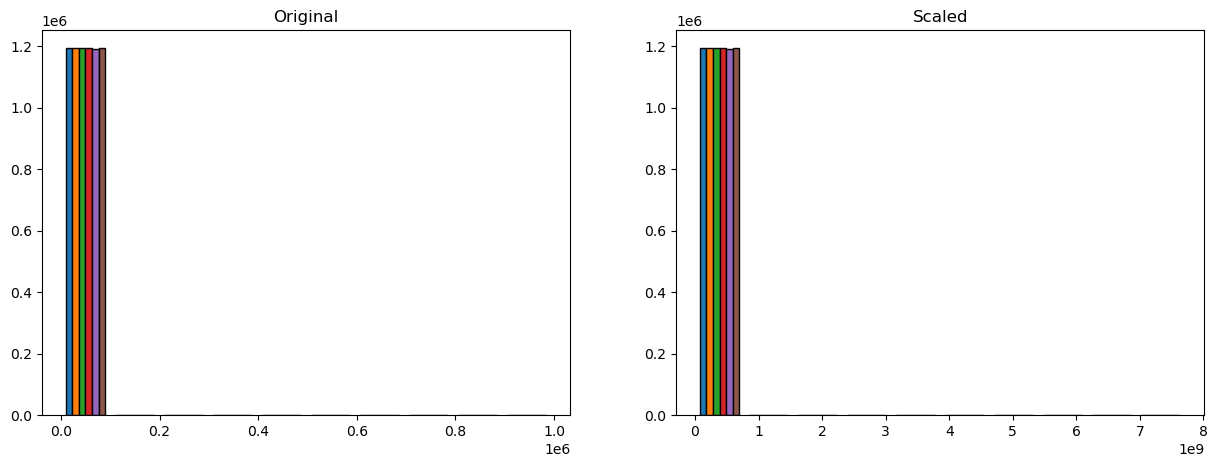

In [11]:
ss_scaler.fit(X_train)

X_train_scaled = ss_scaler.inverse_transform(X_train)
X_validate_scaled = ss_scaler.inverse_transform(X_validate)
X_test_scaled = ss_scaler.inverse_transform(X_test)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(X_train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

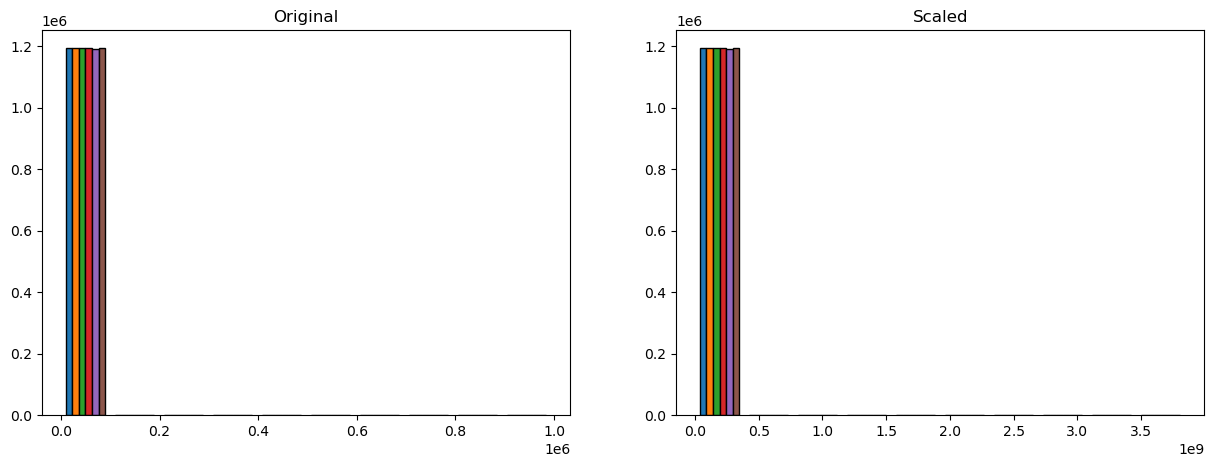

In [12]:
rs_scaler.fit(X_train)

X_train_scaled = rs_scaler.inverse_transform(X_train)
X_validate_scaled = rs_scaler.inverse_transform(X_validate)
X_test_scaled = rs_scaler.inverse_transform(X_test)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(X_train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')


#### Both data sets look the same regardless of the mehtod of the linear transformation

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [13]:
from sklearn.preprocessing import QuantileTransformer

In [20]:
qt = QuantileTransformer(output_distribution='normal')
qt.fit_transform(X_train)

array([[ 0.72660581, -0.17910169, -0.11188964, -1.68967008,  0.15908844,
        -5.19933758],
       [-0.27178702, -0.17910169, -0.18165198, -1.17940175, -1.68015572,
        -5.19933758],
       [ 0.72660581, -0.17910169,  0.50562751, -0.29267606, -0.676073  ,
        -5.19933758],
       ...,
       [ 0.72660581, -0.17910169, -0.62414474, -0.05020383, -0.96689049,
        -5.19933758],
       [-1.34020047, -1.28957806, -2.13986474, -1.92640315, -0.35530186,
        -5.19933758],
       [-0.27178702, -0.17910169, -0.24972141,  0.47100434,  0.62071741,
         0.82493339]])

Text(0.5, 1.0, 'Scaled')

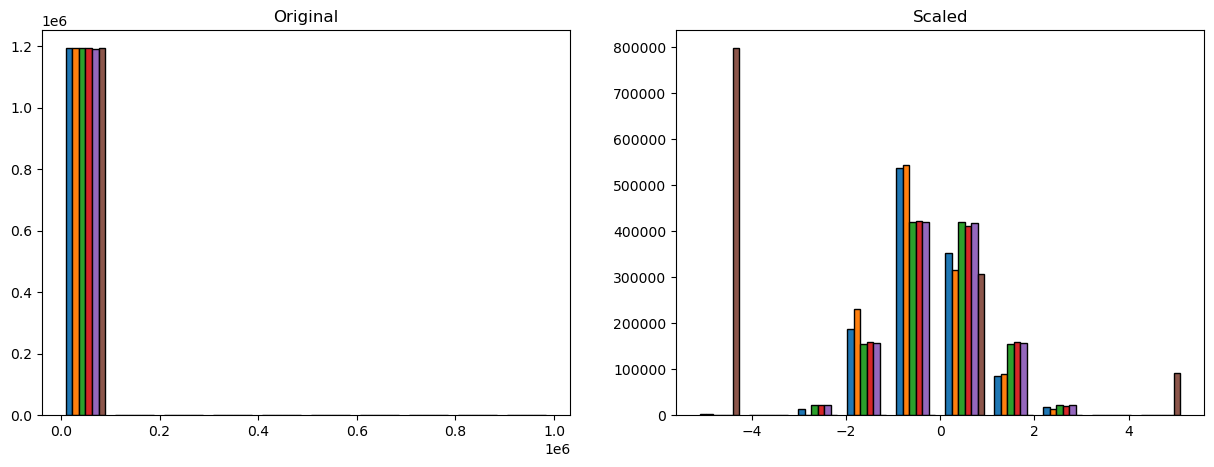

In [21]:
X_train_scaled = qt.transform(X_train)
X_validate_scaled = qt.transform(X_validate)
X_test_scaled = qt.transform(X_test)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(X_train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [18]:
qt = QuantileTransformer()
qt.fit_transform(X_train)

array([[0.76626627, 0.42992993, 0.45645646, 0.04654655, 0.56220252,
        0.        ],
       [0.39389389, 0.42992993, 0.42892893, 0.12062062, 0.04703479,
        0.        ],
       [0.76626627, 0.42992993, 0.6956957 , 0.38738739, 0.25051831,
        0.        ],
       ...,
       [0.76626627, 0.42992993, 0.26726727, 0.48248248, 0.16701037,
        0.        ],
       [0.09109109, 0.0985986 , 0.01679757, 0.02802803, 0.36246396,
        0.        ],
       [0.39389389, 0.42992993, 0.4014014 , 0.68368368, 0.7325101 ,
        0.7962963 ]])

Text(0.5, 1.0, 'Scaled')

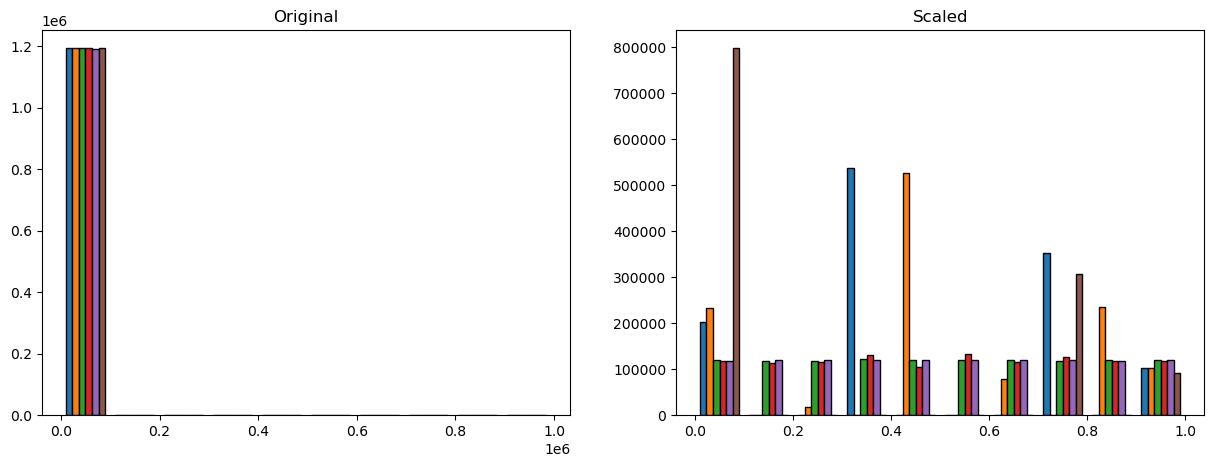

In [19]:
X_train_scaled = qt.transform(X_train)
X_validate_scaled = qt.transform(X_validate)
X_test_scaled = qt.transform(X_test)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(X_train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, ec='black')
plt.title('Scaled')

#### the two distributions are different, the normal distribution is distributed more to the center versus the uniform distribution is distributed evenly.

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [26]:
def robust_scaler(X_train, X_validate, X_test):
    
    X_train, y_train, X_validate, y_validate, X_test, y_test = xy_subsets(train, validate, test)
    rs_scaler = RobustScaler()
    rs_scaler.fit(X_train)
    
    X_train_scaled = rs_scaler.transform(X_train)
    X_validate_scaled = rs_scaler.transfrom(X_validate)
    X_test_scaled = rs_scaler.transform(X_test)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled